밑바닥부터 시작하는 딥러닝 2
# 1.3 신경망의 학습

## 손실함수(Loss Function)

-> 하나의 데이터에 대해 실제값과 예측값의 차이를 정의하는 함수
    
-> 신경망에서는 주로 CEE 사용

* MSE (Mean squarred error: 평균 제곱오차)- 주로 Regression 문제에 사용
* CEE (Cross entropy error: 교차 엔트로피 오차)- 주로 Classification 문제에 사용(원핫인코딩 한 경우에만)

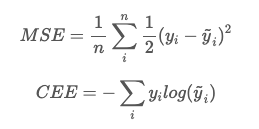

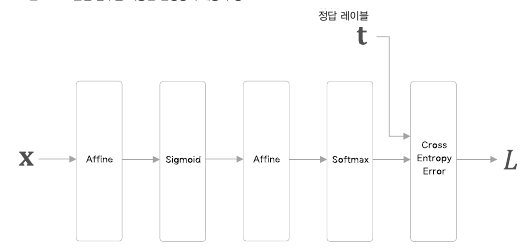

## 계산 그래프

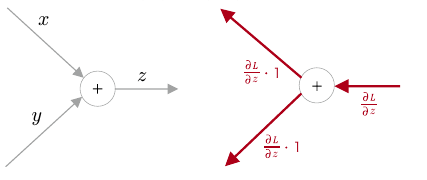

왼쪽: 순전파, 오른쪽: 역전파

In [1]:
# Repeat 노드

import numpy as np

D, N = 8, 7
x = np.random.randn(1, D) # 입력
y = np.repeat(x, N, axis = 0) # 순전파
dy = np.random.randn(N, D) # 무작위 기울기
dx = np.sum(dy, axis = 0, keepdims = True) # 역전파

print(x)
print('-'* 50)
print(y)
print('-'* 50)
print(dy)
print('-'* 50)
print(dx)

[[ 0.23305049  0.29450964 -0.00157479  1.17966529  0.79369231  0.07594271
  -0.87582608  0.18983927]]
--------------------------------------------------
[[ 0.23305049  0.29450964 -0.00157479  1.17966529  0.79369231  0.07594271
  -0.87582608  0.18983927]
 [ 0.23305049  0.29450964 -0.00157479  1.17966529  0.79369231  0.07594271
  -0.87582608  0.18983927]
 [ 0.23305049  0.29450964 -0.00157479  1.17966529  0.79369231  0.07594271
  -0.87582608  0.18983927]
 [ 0.23305049  0.29450964 -0.00157479  1.17966529  0.79369231  0.07594271
  -0.87582608  0.18983927]
 [ 0.23305049  0.29450964 -0.00157479  1.17966529  0.79369231  0.07594271
  -0.87582608  0.18983927]
 [ 0.23305049  0.29450964 -0.00157479  1.17966529  0.79369231  0.07594271
  -0.87582608  0.18983927]
 [ 0.23305049  0.29450964 -0.00157479  1.17966529  0.79369231  0.07594271
  -0.87582608  0.18983927]]
--------------------------------------------------
[[ 1.97748639 -0.13452233  0.98129348  0.43210148 -0.264461   -1.04720365
   1.18708467 

* 복제

In [2]:
# Sum 노드

D, N = 8, 7
x = np.random.randn(N, D) # 입력
y = np.sum(x, axis =  0, keepdims = True) #순전파

dy = np.random.randn(1, D) # 무작위 기울기
dx = np.repeat(dy, N, axis = 0) # 역전파

print(x)
print('-'* 50)
print(y)
print('-'* 50)
print(dy)
print('-'* 50)
print(dx)

[[-1.34406776  0.72797732 -0.45794429  0.23596858 -1.32891987  0.97226221
   0.56191155  0.52090353]
 [-0.38766766  1.27573155 -1.26618499  0.7188326  -0.14002226  0.10469113
   0.29524426 -0.4959931 ]
 [ 1.23252812 -1.02544691 -0.41081867 -0.80155501  1.5415451  -0.49869548
   1.09021152  1.33628097]
 [ 1.07178643 -1.1292717   0.53233251 -0.46509532  0.78765764 -0.43013217
  -1.0271453  -0.32915864]
 [-1.13005514 -1.08735878  0.97330461 -0.54637665  0.18987788  0.03122858
  -1.12361054  0.61834856]
 [ 0.61933637  0.818919    1.57561241 -1.26425917  0.35572574  0.25764121
   0.76869297 -3.197896  ]
 [ 0.97409921  0.11621326 -0.56050582  0.16197076  3.15570771 -1.08800242
  -1.77640959  0.31490442]]
--------------------------------------------------
[[ 1.03595956 -0.30323626  0.38579576 -1.96051423  4.56157195 -0.65100695
  -1.21110513 -1.23261027]]
--------------------------------------------------
[[-0.52923315  1.50516671  0.26827239  0.80512495 -0.69943559  1.10231015
  -0.45682828 

* 합

In [3]:
# MatMul 노드

class MatMul:
    def __init__(self, W):
        self.params = [w] # 매개변수 보관
        self.grades = [np.zeros_like(W)] # 기울기 보관
        self.x = None
        
    def forward(self, x):
        W, = self.params
        out = np.matmul(x, W)
        self.x = x
        return out

    def backward(self, dout):
        W, = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        self.grads[0][...] = dw # 깊은 복사
        return dx